# Modelo S-I-R Predicción población activa con discapacidad que esta desocupada

Predicción de la progresión personas con dispacacidad en edad activa que estan ocupadas o desocupadas 

En Colombia en el anio 2020 tenemos a la poblacion total con discapcidad, una parte de estos llega a la edad activa sin tabajo, los detalles de la expacion de personas con discapcidad en edad de trabajar que encontraron trabajo.

Una informacion importante es si la tasa de crecimientos de desocupados de la poblacion con discapcidad podria disminuir con el aumento de los años, para lo cual se extrajeron muestras y se aplico metodo SIR y asi comparar la infomracion obtenida con los antecednetes que se tiene y ver su indice de crecimiento segun cada año.

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45

In [8]:
poblacionTotal =[418, 417, 415, 412, 409, 404, 397, 388, 377, 361, 342]
Desocupados=[3, 4, 6, 8, 11, 16, 22, 30, 40, 54, 70]
ocupados =[0, 0, 0, 1, 1, 1, 2, 3, 4, 6, 9]
df=pd.DataFrame({'Poblacion Total':poblacionTotal,'Desocupados':Desocupados, 'ocupados': ocupados })
df

,Poblacion Total,Desocupados,ocupados
0,418,3,0
1,417,4,0
2,415,6,0
3,412,8,1
4,409,11,1
5,404,16,1
6,397,22,2
7,388,30,3
8,377,40,4
9,361,54,6


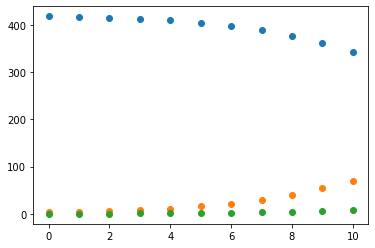

In [10]:
plt.scatter(df.index,df['Poblacion Total']) #azul
plt.scatter(df.index,df['Desocupados'])  # naranja
plt.scatter(df.index,df['ocupados']) #recuperados

# Modelo SIR

El modelo SIR es un modelo compartimental que rastrea el crecimiento y la descomposición de las tres etapas principales...


* P: Población Total
* D: Desocupados
* O: Ocupados

Modelo:  

$\alpha$: Razón de cambio de desocupados
$\beta$: razón de cambio de ocupados 
 

Ecuaciones (ODE):
\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}T}= - \alpha S I  \\
& \frac{\mathrm{d}I}{\mathrm{d}T}= \alpha S I - \beta I  \\
& \frac{\mathrm{d}R}{\mathrm{d}T}= \beta I  \\
 \\
\end{align*}

donde $N=S+I+R$ es la poblacion, $T$ es el lapso de tiepo desde la fecha de inicio.

In [12]:
a= 0.001
b= 0.08

def dP_dt(P, t):
    return [-a*P[0]*P[1], a*P[0]*P[1]-b*P[1],b*P[1]]

ts = np.linspace(0, 20, 20)
P0 = [418, 3, 0]
Ps = odeint(dP_dt, P0, ts)
S= Ps[:,0]
I= Ps[:,1]
R= Ps[:,2]
print(Ps)

[[4.18000000e+02 3.00000000e+00 0.00000000e+00]
 [4.16418105e+02 4.27856560e+00 3.03329342e-01]
 [4.14174610e+02 6.08988753e+00 7.35502824e-01]
 [4.11006625e+02 8.64360708e+00 1.34976793e+00]
 [4.06560548e+02 1.22195665e+01 2.21988517e+00]
 [4.00374112e+02 1.71793248e+01 3.44656347e+00]
 [3.91868020e+02 2.39674732e+01 5.16450664e+00]
 [3.80361709e+02 3.30895898e+01 7.54870134e+00]
 [3.65134642e+02 4.50481371e+01 1.08172210e+01]
 [3.45555774e+02 6.02180366e+01 1.52261892e+01]
 [3.21287642e+02 7.86607885e+01 2.10515696e+01]
 [2.92526905e+02 9.99191124e+01 2.85539825e+01]
 [2.60179631e+02 1.22891637e+02 3.79287323e+01]
 [2.25838168e+02 1.45908810e+02 4.92530214e+01]
 [1.91493633e+02 1.67056217e+02 6.24501502e+01]
 [1.59075750e+02 1.84636176e+02 7.72880741e+01]
 [1.30033567e+02 1.97551329e+02 9.34151037e+01]
 [1.05135732e+02 2.05445929e+02 1.10418339e+02]
 [8.45161528e+01 2.08600745e+02 1.27883102e+02]
 [6.78648499e+01 2.07698092e+02 1.45437058e+02]]


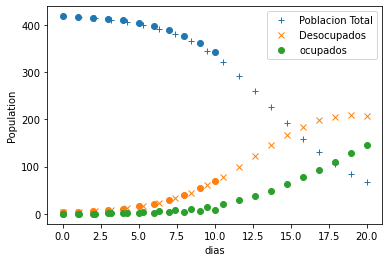

In [13]:
plt.plot(ts,S, "+", label="Poblacion Total")
plt.plot(ts,I, "x", label="Desocupados")
plt.plot(ts,R, "o", label="ocupados")
plt.scatter(df.index,df['Poblacion Total'])
plt.scatter(df.index,df['Desocupados'])
plt.scatter(df.index,df['ocupados'])
plt.xlabel("dias")
plt.ylabel("Population")
plt.rcParams['figure.figsize'] = (20, 7)
plt.legend();

Tras el análisis de sensibilidad, se obtiene como resultado las razones de cambio que más se ajustan al modelo estimado son: :0.001 : 0.08, la tasa de poblacion total en comparacion con los desocupados y ocupados es inversamente proporsional.

# GRÁFICA DE LOS DATOS DE LA TABLA
Los puntos azules son los infectados.
Los puntos naranjas son los recuperados.

In [21]:
from datetime import datetime, timedelta
inicio=datetime(2020,2,1)
fin=datetime(2020,5,26)
list_fechas3=[(inicio + timedelta(days=d)).strftime("%Y-%m-%d") for d in range((fin - inicio).days + 1)] 
Susceptibles3=[46899999,46899998,46899997,46899996,46899995,46899994,46899993,46899992,46899991,46899990,46899988,46899986,46899984,46899982,46899980,46899978,46899976,46899974,46899972,46899970,46899968,46899966,46899964,46899962,46899960,46899957,46899948,46899931,46899896,46899842,46899760,46899624,46899432,46899165,46898817,46898286,46897522,46898450,46897566,46896543,46895384,46893849,46891842,46889698,46887979,46884978,46881231,46877158,46872108,46866125,46860809,46855383,46847253,46837127,46826525,46815002,46803830,46794982,46787098,46776474,46765673,46753994,46742952,46732583,46757389,46717165,46709185,46698789,46688900,46680860,46672869,46665688,46660322,46654429,46646656,46638892,46636908,46631373,46629391,46623943,46619065,46613352,46607101,46601882,46596023,46591358,46587555,46584357,46577111,46572767,46568533,46564948,46562359,46559452,46556270,46552874,46549444,46545634,46542087,46536457,46535091,46532818,46530486,46527086,46525034,46522856,46519074,46518018,46517587,46517069,46516587,46514800,46514334,46513852,46514224,46513365]
Infectados3=[1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,9,17,35,54,82,136,192,267,348,531,764,1094,1527,2299,3274,4427,5958,7641,9785,11491,13994,17688,21735,26304,31750,36616,41262,48953,57506,66460,75641,83885,90309,96122,104267,111680,119263,126535,133198,138731,142398,147607,153190,158935,163472,168022,171921,174951,178067,182491,186311,190129,193965,193252,195470,198421,200733,203649,205763,208269,209910,211570,213095,213942,215183,216570,217804,218739,219205,220244,221124,222045,223218,223961,227377,227770,228252,228691,229540,230183,230698,231350,231606,232037,232555,233037,234824,235290,235772,235400,236259]
Recuperados3=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,135,183,189,193,517,517,530,1028,1081,1107,1588,2125,2575,3355,3794,5367,7015,9357,12285,14709,16780,19259,22647,26743,30513,34219,3880,40437,43208,48021,52165,55668,59109,62391,64727,67504,70853,74797,72963,74662,77357,80587,82514,85915,89250,92355,95708,98732,100875,102548,108947,112050,114897,117248,118902,121343,123486,126002,128511,131148,133952,136166,137139,138930,140823,143374,144783,146446,149576,150376,150376,150376,150376,150376,150376,150376,150376,150376]
df=pd.DataFrame({'Fecha':list_fechas3,'Poblacion Total':poblacionTotal,'Desocupados3': Desocupados3,'ocupados3':ocupados3})
df


NameError: name 'Desocupados3' is not defined

## GRÁFICA DE LOS DATOS DE LA TABLA
- Los puntos azules son los desocupados.
- Los puntos naranjas son los ocupados.

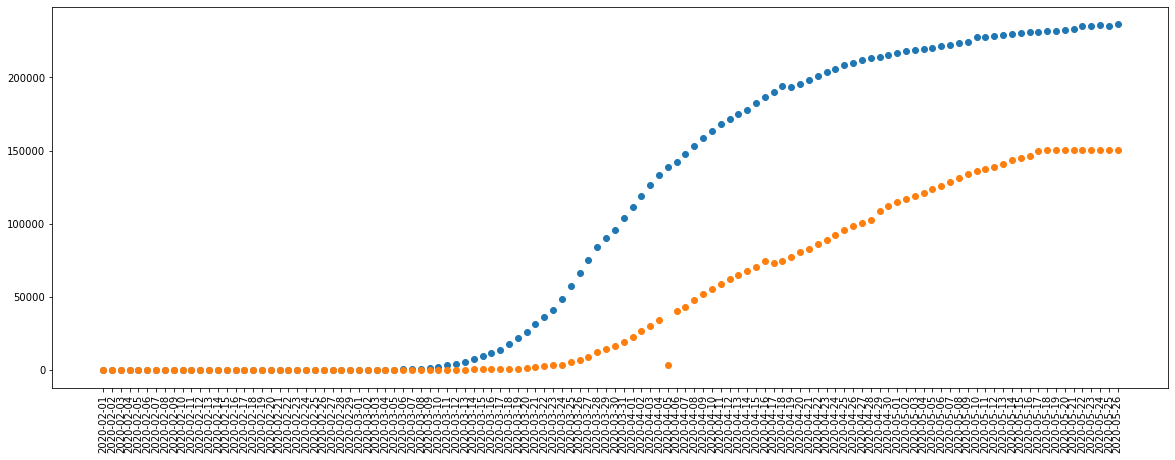

In [22]:
#plt.scatter(list_fechas3, Susceptibles3)
plt.scatter(list_fechas3, Infectados3) # puntos Azules
plt.scatter(list_fechas3, Recuperados3) # []
plt.xticks(list_fechas3,rotation=90)
plt.rcParams['figure.figsize'] = (15, 6)

In [23]:
a= 0.0075
b= 0.025

def dP_dt(P, t):
    return [-a*P[0]*P[1], a*P[0]*P[1]-b*P[1],b*P[1]]

ts = np.linspace(0, 170, 170)
P0 = [46899999, 1, 0]
Ps = odeint(dP_dt, P0, ts)
S= Ps[:,0]
I= Ps[:,1]
R= Ps[:,2]
print(Ps)

[[ 4.68999990e+07  1.00000000e+00  0.00000000e+00]
 [ 4.19246286e-22  4.57353262e+07  1.16467378e+06]
 [ 4.29451942e-22  4.45995189e+07  2.30048106e+06]
 [ 9.12891318e-23  4.34919187e+07  3.40808130e+06]
 [-2.36444601e-22  4.24118250e+07  4.48817500e+06]
 [-9.45782985e-23  4.13585547e+07  5.54144528e+06]
 [ 4.28660076e-22  4.03314417e+07  6.56855825e+06]
 [ 2.26597866e-22  3.93298365e+07  7.57016355e+06]
 [-1.13593056e-22  3.83531054e+07  8.54689463e+06]
 [-3.23331639e-22  3.74006308e+07  9.49936922e+06]
 [ 1.90374574e-22  3.64718103e+07  1.04281897e+07]
 [ 2.42481379e-22  3.55660564e+07  1.13339436e+07]
 [-1.63317531e-22  3.46827964e+07  1.22172036e+07]
 [-4.49851945e-22  3.38214716e+07  1.30785284e+07]
 [ 9.47161428e-23  3.29815372e+07  1.39184628e+07]
 [ 8.44517491e-22  3.21624620e+07  1.47375380e+07]
 [ 1.58095018e-22  3.13637281e+07  1.55362719e+07]
 [ 9.31957475e-23  3.05848302e+07  1.63151698e+07]
 [-9.33746241e-24  2.98252757e+07  1.70747243e+07]
 [-8.37960047e-23  2.90845843e+

## MODELO PREDICCIÓN POD

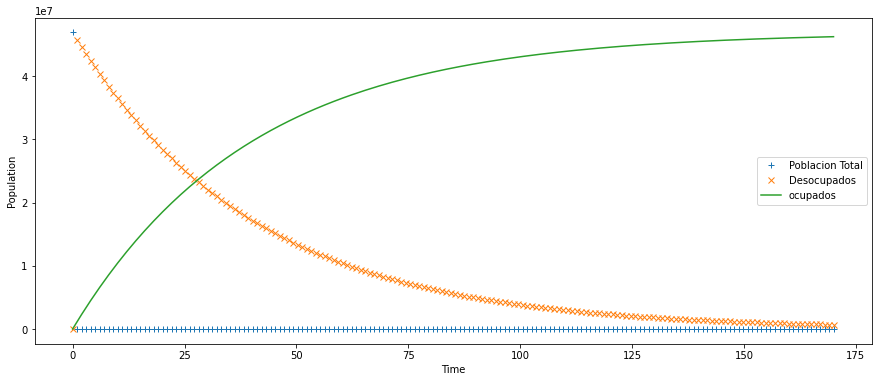

In [24]:
plt.plot(ts,S, "+", label="Poblacion Total")
plt.plot(ts,I, "x", label="Desocupados")
plt.plot(ts,R, "-", label="ocupados")

#plt.scatter(df.index,df['Susceptibles3'])
#plt.scatter(df.index,df['Infectados3'])
#plt.scatter(df.index,df['Recuperados3'])
#plt.scatter(list_fechas3, Infectados3)
#plt.xticks(df.index,rotation=90)
plt.xlabel("Time")
plt.ylabel("Population")

plt.rcParams['figure.figsize'] = (30, 20)
plt.legend()
#plt.show()